# 5.2: Why Employees Quit!

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and processing

In [55]:
# Load the data
df = pd.read_csv('turnover_data.csv')

In [56]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing Values:\n', missing_values)


Missing Values:
 satisfaction_level       0
last_evaluation          0
number_patients          0
average_montly_hours     0
time_spend_clinic        0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [57]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding for categorical features
categorical_features = ["Department", "salary"]
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    

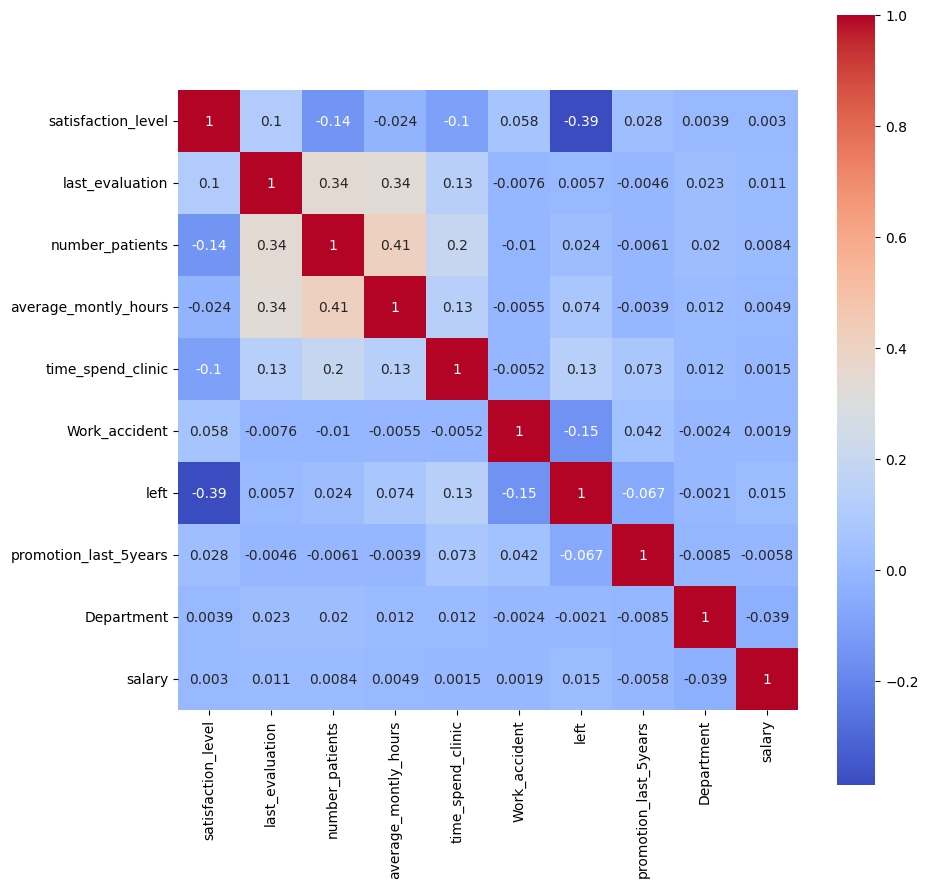

In [58]:

# Check the correlations
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, square=True, cmap='coolwarm')
plt.show()


In [59]:
df

,satisfaction_level,last_evaluation,number_patients,average_montly_hours,time_spend_clinic,Work_accident,left,promotion_last_5years,Department,salary
0,0.45,0.57,2,134,3,0,1,0,1,1
1,0.40,0.51,2,145,3,0,1,0,1,1
2,0.45,0.55,2,140,3,0,1,0,1,1
3,0.84,0.87,4,246,6,0,1,0,1,1
4,0.10,0.94,6,255,4,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...
12734,0.91,0.99,5,254,5,0,1,0,3,2
12735,0.85,0.85,4,247,6,0,1,0,3,1
12736,0.90,0.70,5,206,4,0,1,0,3,1
12737,0.46,0.55,2,145,3,0,1,0,3,1


### Average satisfaction level of employees that leave FAU Clinic

In [60]:
left_employees_data = df[df['left'] == 1]
Avg_Satisfection_Level_Employee_Leaving = left_employees_data['satisfaction_level'].mean()

print("Avg_Satisfection_Level_Employee_Leaving :", Avg_Satisfection_Level_Employee_Leaving)

Avg_Satisfection_Level_Employee_Leaving : 0.4377889447236182


## Salary's role for staff who decide to quit their job

In [61]:

left_employees_data = df[df['left'] == 1]

Salary_role_Employee_Leaving = left_employees_data['salary'].mean()

print("Avg_Salary_Employee_Leaving :", Salary_role_Employee_Leaving)

Avg_Salary_Employee_Leaving : 1.3628140703517588


In [62]:
df1 = pd.read_csv('turnover_data.csv')

# Create the 2D count matrix using pd.crosstab()
count_matrix = pd.crosstab(df1['left'], df1['salary'])

print(count_matrix)

salary  high   low  medium
left                      
0       1022  4387    4345
1         74  1754    1157


# 5.3: Turnover Prediction

In [63]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop(['left'], axis=1)
y = df['left']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


# Build the model
#model = RandomForestClassifier(random_state=42)
#model = SVC(random_state=42)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('Model Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_rep)


Model Accuracy: 0.9761904761904762
Confusion Matrix:
 [[2909   34]
 [  57  822]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2943
           1       0.96      0.94      0.95       879

    accuracy                           0.98      3822
   macro avg       0.97      0.96      0.97      3822
weighted avg       0.98      0.98      0.98      3822



#### Individual Data Testing

In [66]:
test_features1 = X.iloc[0]
test_features1 = test_features1.values.reshape(1, -1)

test_features2 = X.iloc[10]
test_features2 = test_features2.values.reshape(1, -1)

test_features3 = X.iloc[130]
test_features3 = test_features3.values.reshape(1, -1)

test_features4 = X.iloc[1300]
test_features4 = test_features4.values.reshape(1, -1)

test_features5 = X.iloc[2330]
test_features5 = test_features5.values.reshape(1, -1)


In [67]:
predicted_rating1 = model.predict(test_features1)
print("Predicted Performance Rating:", predicted_rating1[0])

predicted_rating2 = model.predict(test_features2)
print("Predicted Performance Rating:", predicted_rating2[0])

predicted_rating3 = model.predict(test_features3)
print("Predicted Performance Rating:", predicted_rating3[0])

predicted_rating4 = model.predict(test_features4)
print("Predicted Performance Rating:", predicted_rating4[0])

predicted_rating5 = model.predict(test_features5)
print("Predicted Performance Rating:", predicted_rating5[0])

Predicted Performance Rating: 1
Predicted Performance Rating: 1
Predicted Performance Rating: 1
Predicted Performance Rating: 1
Predicted Performance Rating: 0


C:\Users\ALIF\miniconda3\envs\PepAna\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\ALIF\miniconda3\envs\PepAna\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\ALIF\miniconda3\envs\PepAna\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\ALIF\miniconda3\envs\PepAna\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\ALIF\miniconda3\envs\PepAna\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature nam

#### Feature Importance

In [68]:
# Feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print('Feature Importances:\n', feature_importances)

Feature Importances:
 satisfaction_level       0.553239
time_spend_clinic        0.163610
number_patients          0.113903
last_evaluation          0.097831
average_montly_hours     0.069227
Work_accident            0.001107
salary                   0.001084
promotion_last_5years    0.000000
Department               0.000000
dtype: float64
